# How can frog grow its tail back?


## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [ ]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-02-19 20:19:58--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  17.2MB/s    in 5.8s    

2025-02-19 20:20:05 (15.5 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_file = "/content/frogtail.zip" # replace path to your zip file's path
extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


In [ ]:
zip_file = extract_dir+"ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



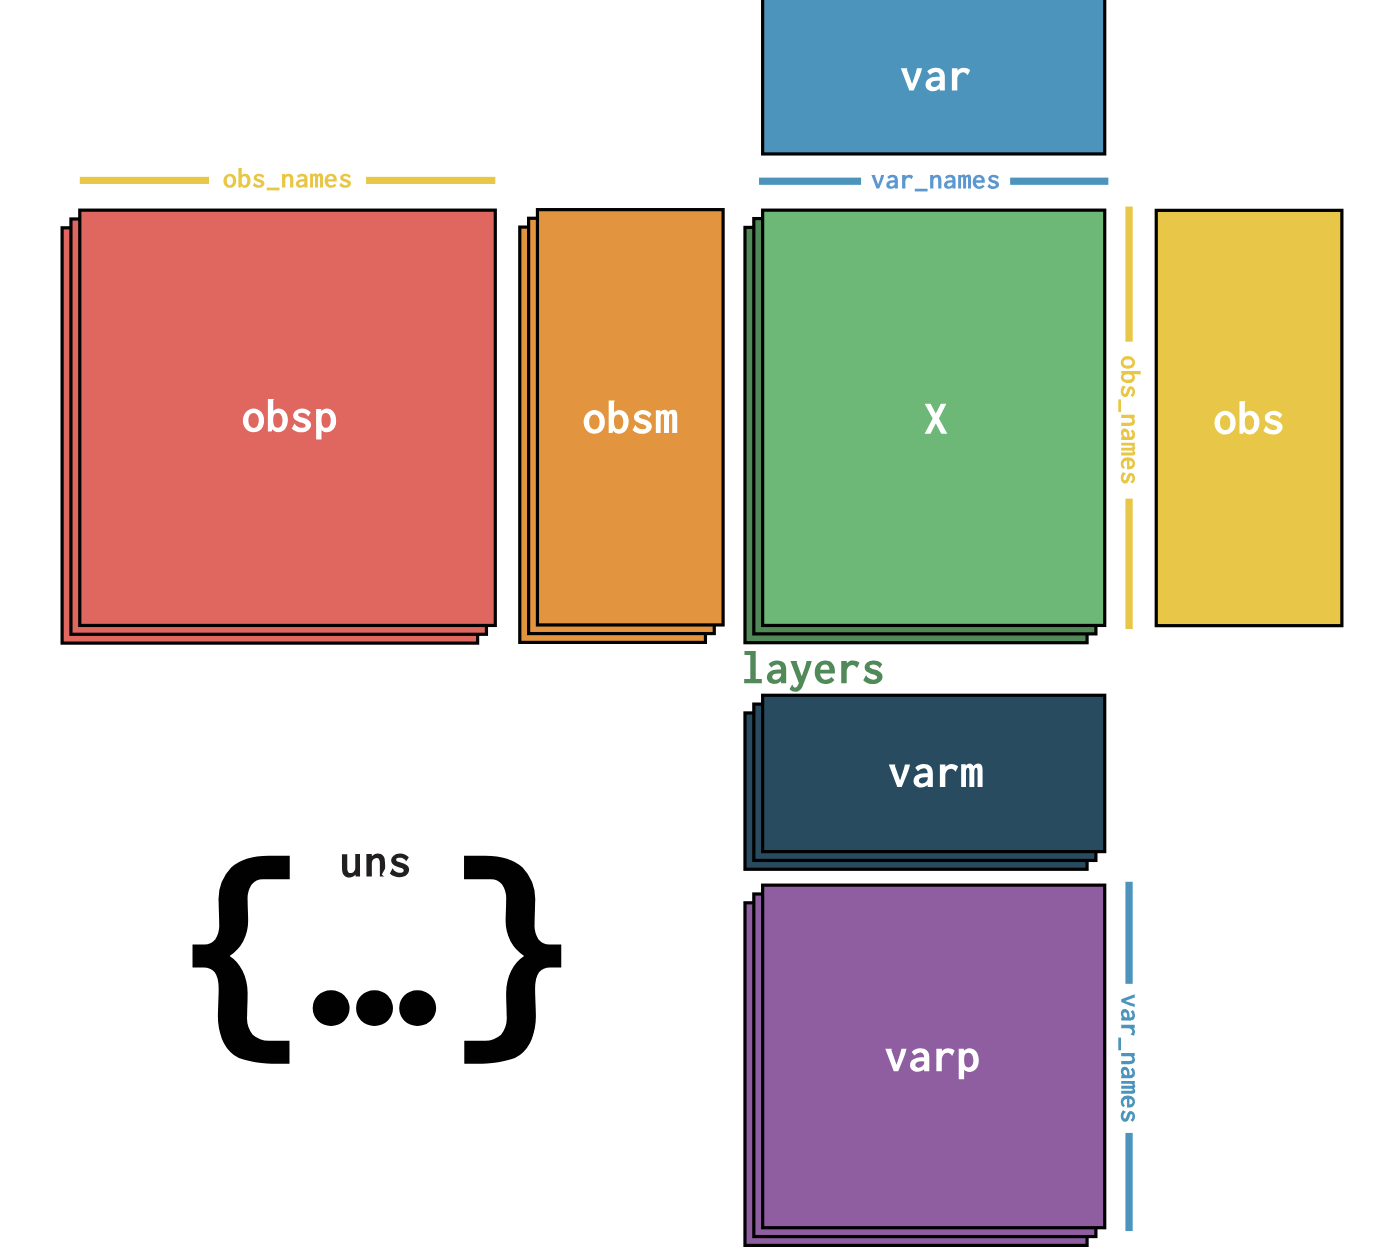

In [ ]:
!pip install anndata
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread


X = mmread(extract_dir+'ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'ArrayExpress/meta.csv')


adata = ad.AnnData(X.T) # convert gene expression into an AnnData object transpose

/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [ ]:
cells.columns = ['barcode_cells'] # rename columns for better readability
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left') # merge metadata

In [ ]:
# links metadata to cells
# ensures that each cell has its corresponding metadata
adata.var_names = genes[0] # assign gene names to the AnnData object
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell') # merge metadata with cell info

In [ ]:
adata # 13199 cells (observations) and 31535 genes (variables)

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [ ]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


In [ ]:
# converts sparse matrix into a compressed row format
# improves performance for downstream calculations
adata.X = adata.X.tocsr()

In [ ]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad') # saves preprocessed data for later use

## Load data

In [ ]:
import anndata as ad
extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/"
adata = ad.read_h5ad('/content/drive/MyDrive/TA/Frogtail_files/cleaned_processed_frogtail.h5ad') # ad.read_h5ad()

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


In [ ]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [ ]:
adata.X.toarray()[:5, :20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


## Processing data

In [ ]:
adata.layers["counts"] = adata.X.copy()


In [ ]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [ ]:
sc.pp.filter_genes(adata, min_cells=3) # remove genes expressed in <3 cells
sc.pp.filter_cells(adata, min_genes=200) # remove cells with <200 detected genes
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

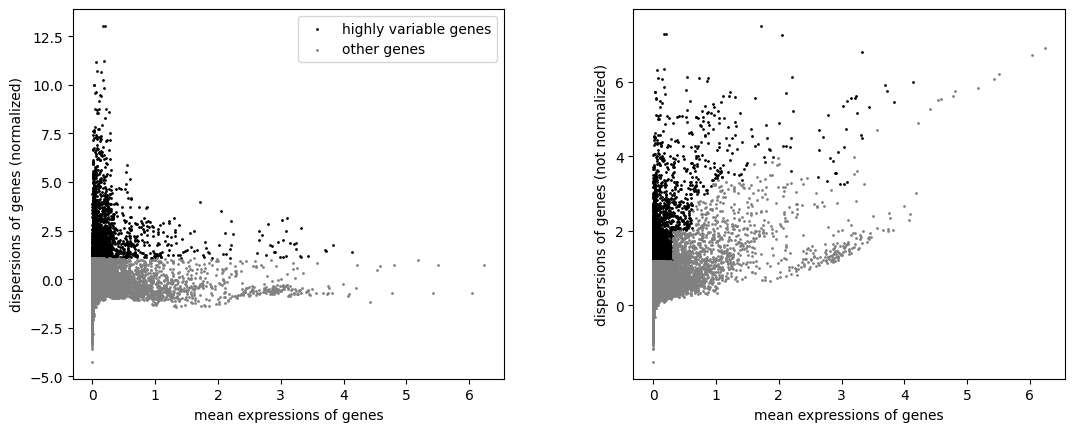

In [ ]:
sc.pl.highly_variable_genes(adata)

## Project 1

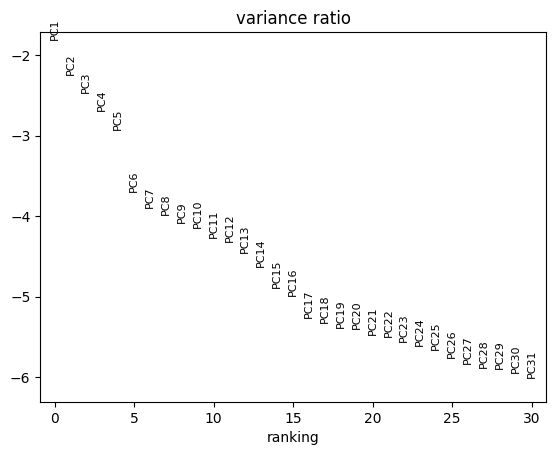

In [ ]:
sc.pp.pca(adata, n_comps=50)  # Compute PCA, keeping 50 components
sc.pl.pca_variance_ratio(adata, log=True)  # Plot explained variance

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)  # Build a graph structure using 40 PCs

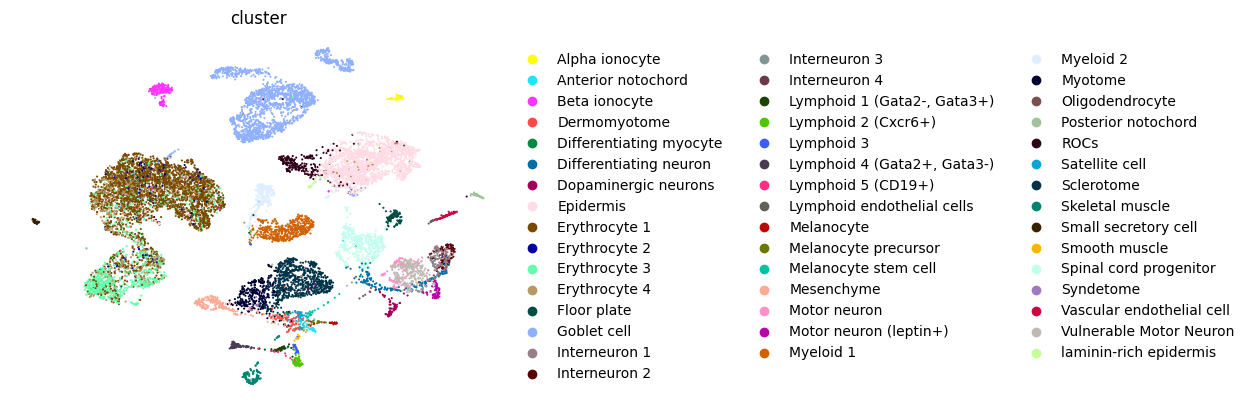

In [ ]:
sc.tl.umap(adata)  # Compute UMAP projection
sc.pl.umap(adata, color=['cluster'], frameon=False)  # Plot clusters

In [ ]:
!pip install python-igraph louvain leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.1 MB/s eta 0:00:00


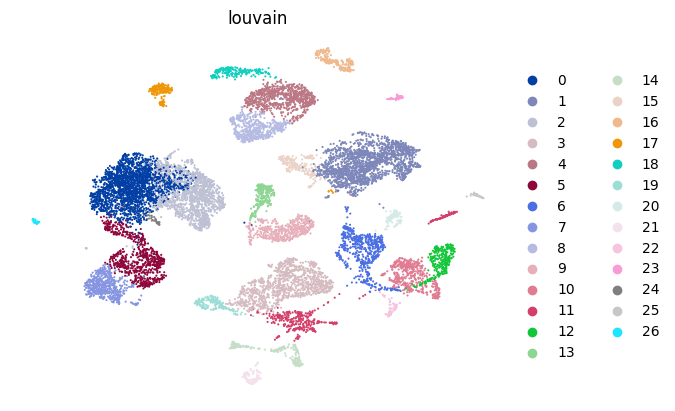

In [ ]:
sc.tl.louvain(adata, resolution=0.6)  # Compute Louvain clusters
sc.pl.umap(adata, color='louvain', frameon=False)  # Plot Louvain clusters

<ipython-input-28-650ee583eeed>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.6)  # Compute Leiden clusters


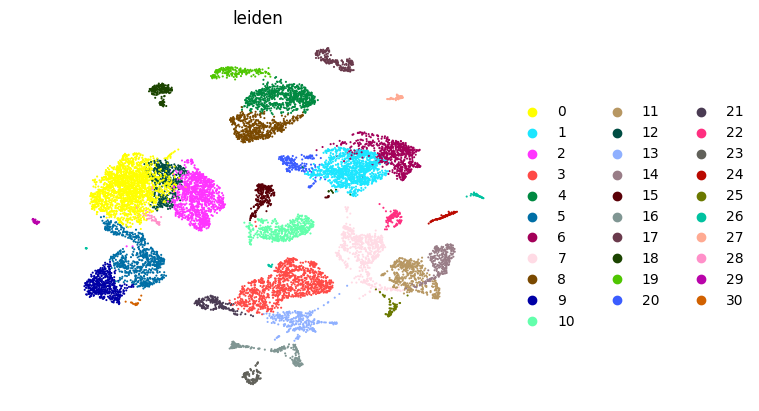

In [ ]:
sc.tl.leiden(adata, resolution=0.6)  # Compute Leiden clusters
sc.pl.umap(adata, color='leiden', frameon=False)  # Plot Leiden clusters

In [ ]:
adata.obs['cluster'].value_counts()  # See all available clusters

,count
cluster,
Erythrocyte 1,2761
Epidermis,1800
Goblet cell,1754
Erythrocyte 3,982
Erythrocyte 4,862
Sclerotome,752
Spinal cord progenitor,505
Myeloid 1,475
Myotome,303


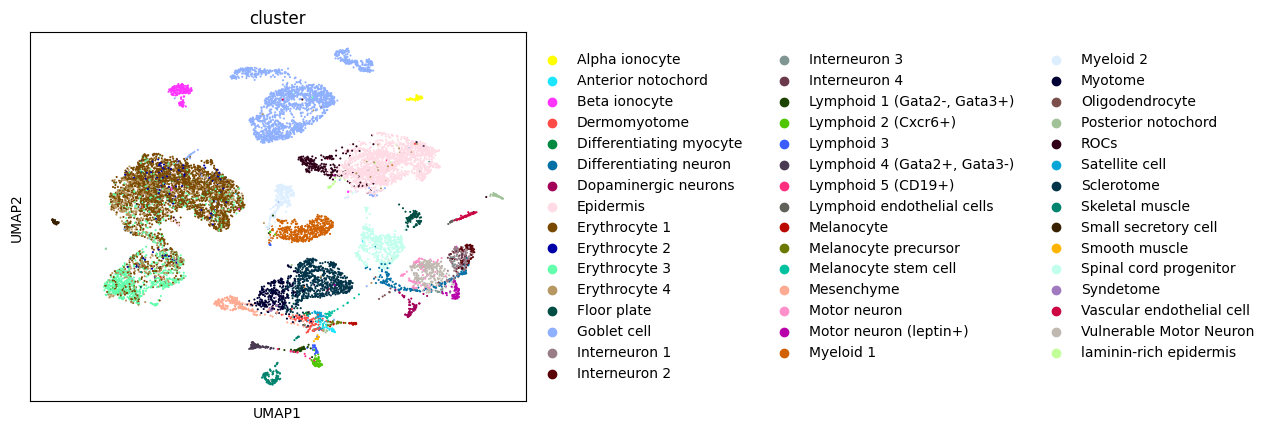

In [ ]:
sc.pl.umap(adata, color=['cluster'])

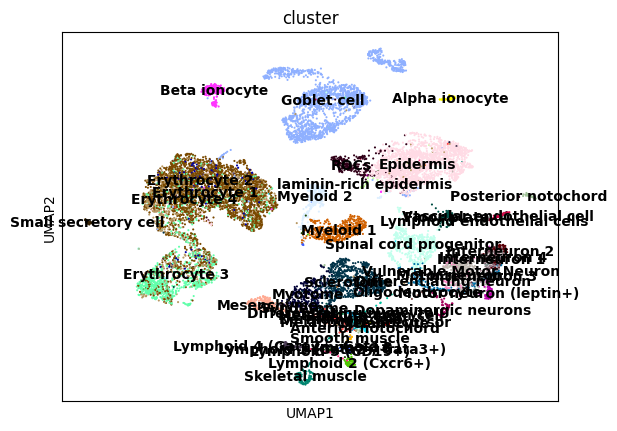

In [ ]:
sc.pl.umap(adata, color=['cluster'], legend_loc='on data')

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score

silhouette = silhouette_score(adata.obsm['X_pca'], adata.obs['louvain'].astype(int))
print(f'Silhouette Score for Louvain Clustering: {silhouette}')

silhouette = silhouette_score(adata.obsm['X_pca'], adata.obs['leiden'].astype(int))
print(f'Silhouette Score for Leiden Clustering: {silhouette}')

ari = adjusted_rand_score(adata.obs['cluster'], adata.obs['louvain'])
print(f'Adjusted Rand Index for Louvain Clustering: {ari}')

ari = adjusted_rand_score(adata.obs['cluster'], adata.obs['leiden'])
print(f'Adjusted Rand Index for Leiden Clustering: {ari}')

calinski_harabasz = calinski_harabasz_score(adata.obsm['X_pca'], adata.obs['louvain'].astype(int))
print(f'Calinski-Harabasz Index for Louvain Clustering: {calinski_harabasz}')

calinski_harabasz = calinski_harabasz_score(adata.obsm['X_pca'], adata.obs['leiden'].astype(int))
print(f'Calinski-Harabasz Index for Leiden Clustering: {calinski_harabasz}')

Silhouette Score for Louvain Clustering: 0.2977546751499176
Silhouette Score for Leiden Clustering: 0.2500985562801361
Adjusted Rand Index for Louvain Clustering: 0.5401925642199593
Adjusted Rand Index for Leiden Clustering: 0.4440041346168185
Calinski-Harabasz Index for Louvain Clustering: 2422.2590273438004
Calinski-Harabasz Index for Leiden Clustering: 2243.1086443652803


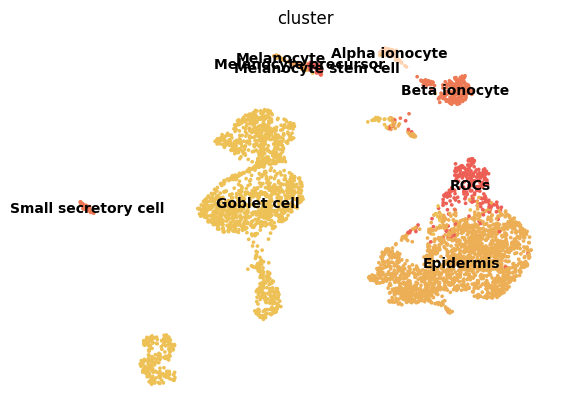

In [ ]:
import scanpy as sc

# Define skin-related cell types
skin_cells = [
    "Small secretory cell", "Melanocyte", "Melanocyte stem cell",
    "Melanocyte precursor", "Goblet cell", "Alpha ionocyte",
    "Beta ionocyte", "Epidermis", "Laminin-rich epidermis", "ROCs"
]

# Subset the AnnData object to only include these clusters
adata_skin = adata[adata.obs["cluster"].isin(skin_cells)].copy()

# Compute UMAP again for the filtered subset
sc.pp.neighbors(adata_skin, n_neighbors=10, n_pcs=40)  # Recompute neighbors
sc.tl.umap(adata_skin)

# Define custom colors for only skin-related clusters
cluster_colors = {
    "Small secretory cell": "#ED7A55",
    "Melanocyte": "#EDAF55",
    "Melanocyte precursor": "#ED9D55",
    "Melanocyte stem cell": "#ED5F55",
    "Goblet cell": "#EDC155",
    "Alpha ionocyte": "#FFD2B1",
    "Beta ionocyte": "#ED7A55",
    "Epidermis": "#EDAF55",
    "Laminin-rich epidermis": "#ED9D55",
    "ROCs": "#ED5F55"
}

# Assign colors to the clusters in the filtered dataset
adata_skin.uns["cluster_colors"] = [cluster_colors[c] for c in adata_skin.obs["cluster"].cat.categories]

# Plot UMAP for the skin subset with updated colors
sc.pl.umap(adata_skin, color="cluster", frameon=False, legend_loc="on data")

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

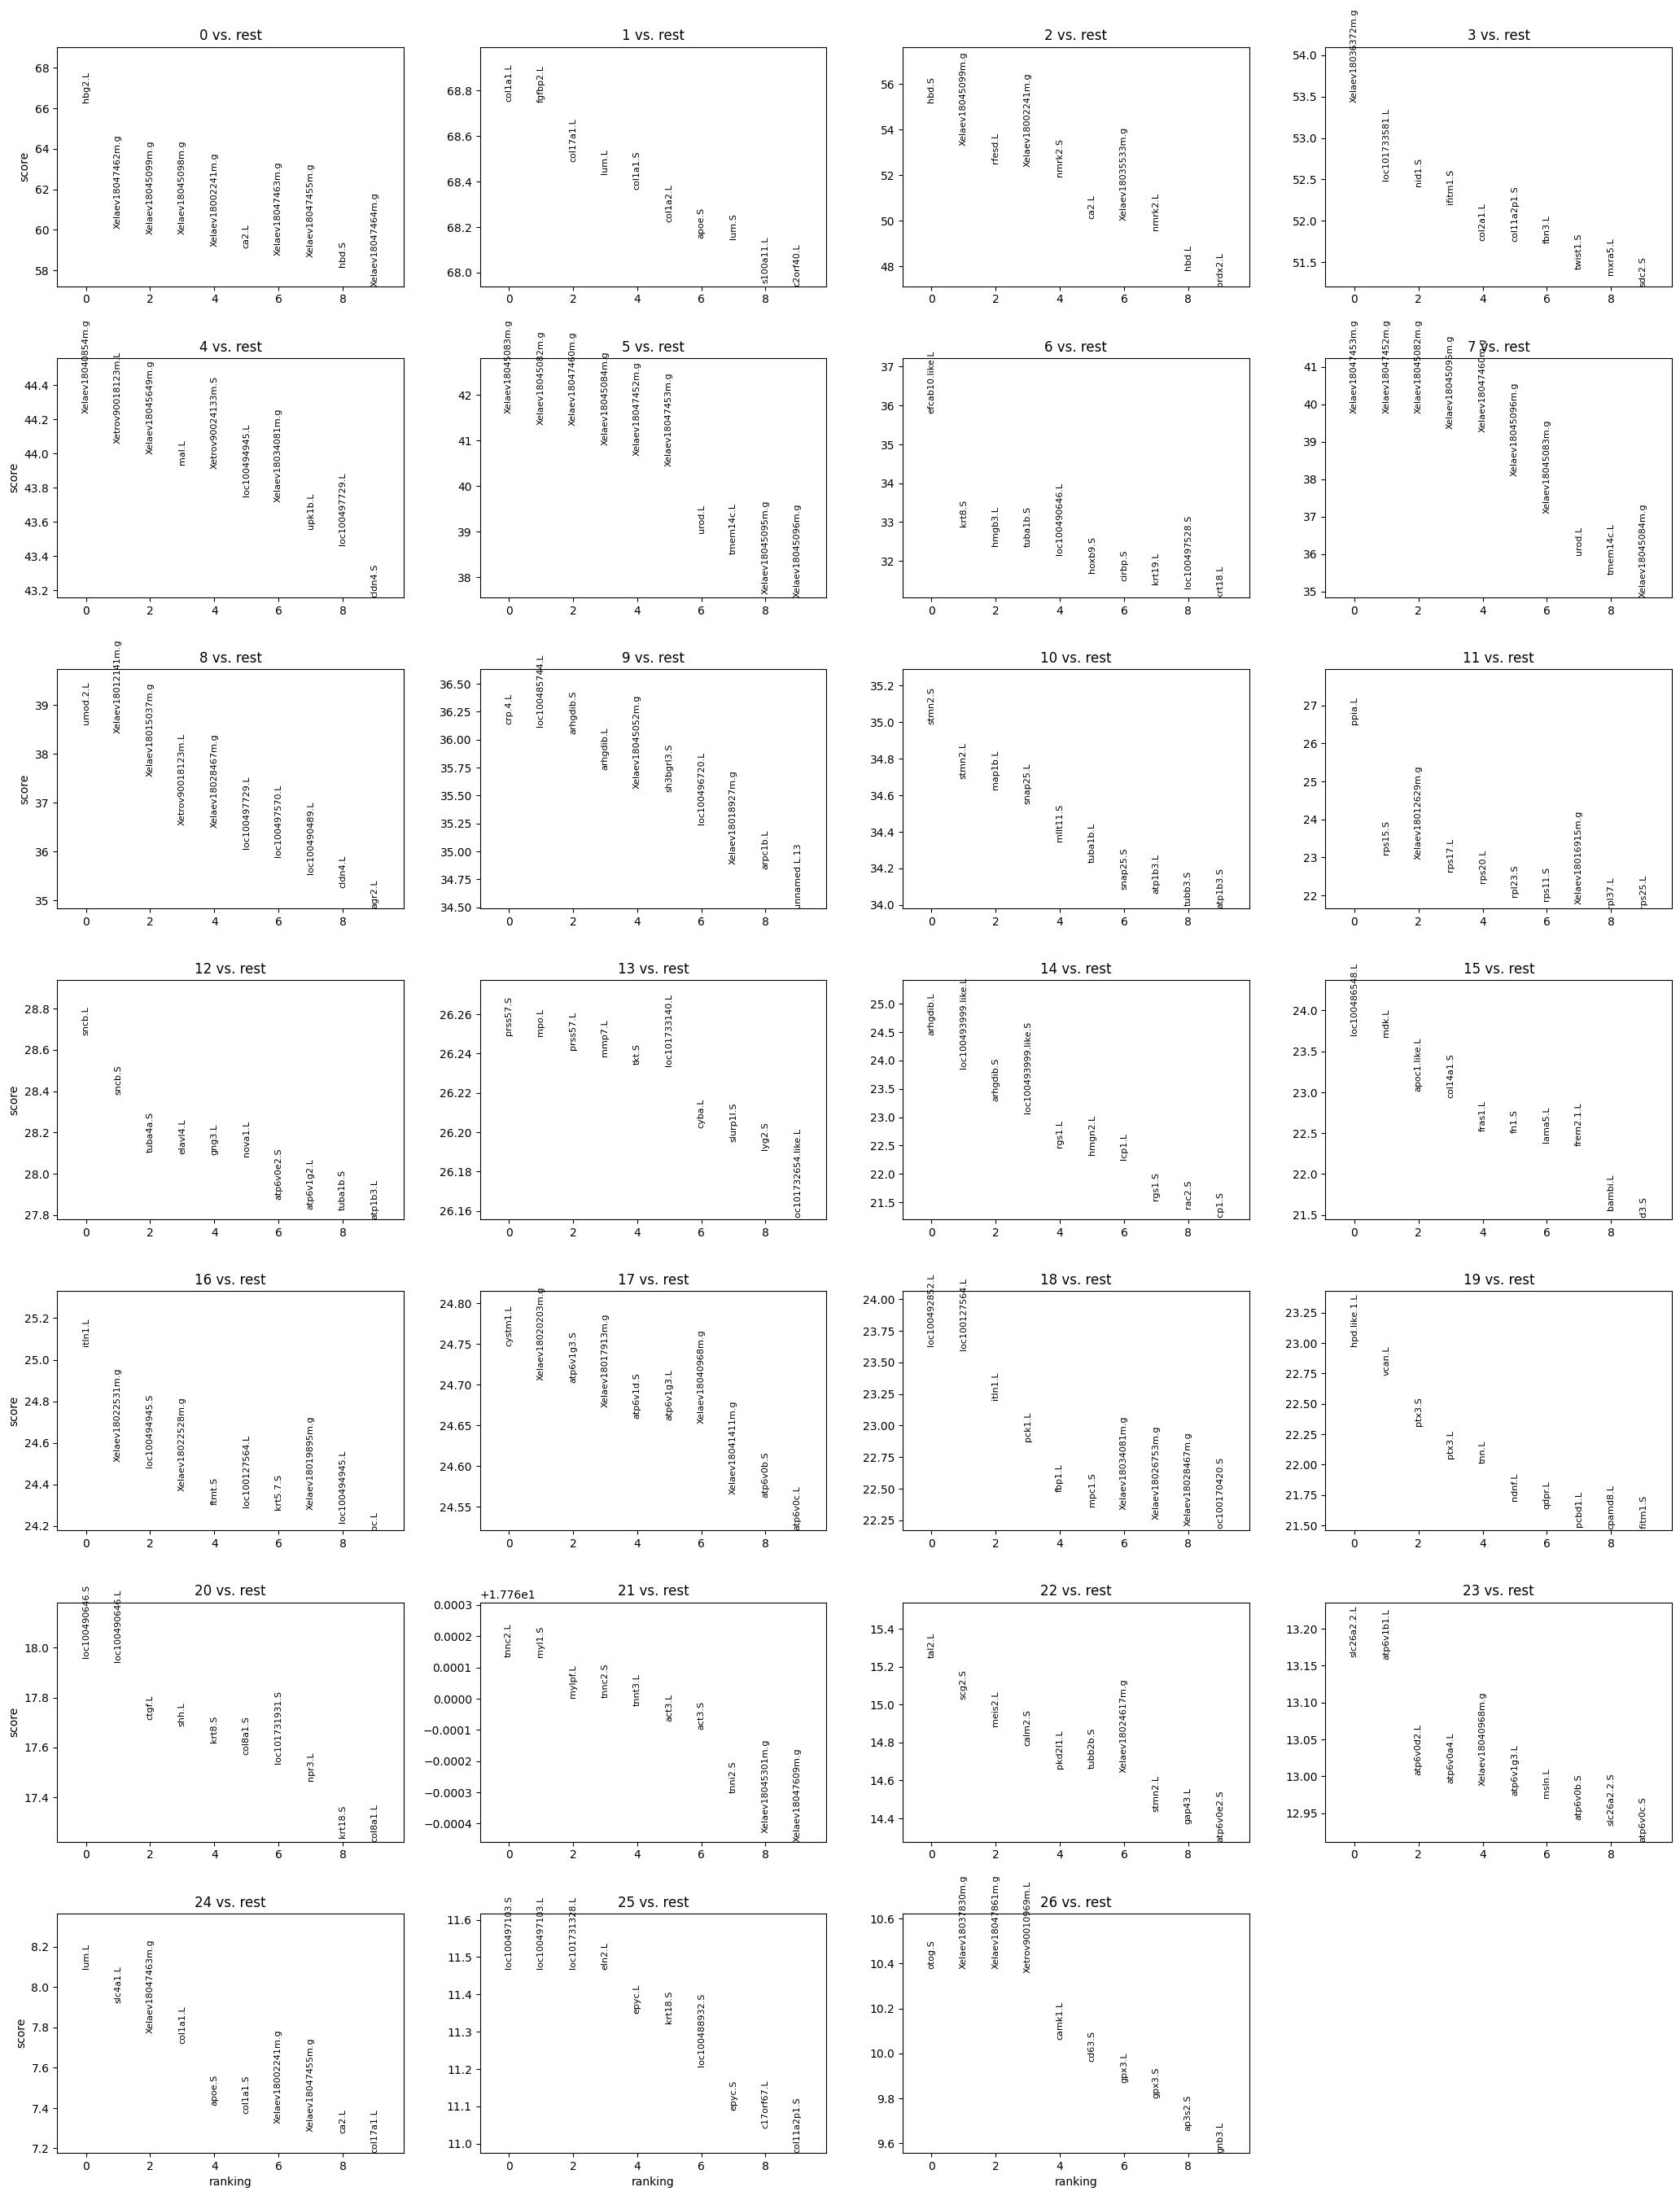

In [ ]:
sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon")  # Rank genes by cluster
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)  # Visualize top markers per cluster

In [ ]:
# Check the mapping between Louvain clusters and biological labels
print(adata.obs.groupby("louvain")["cluster"].agg(lambda x: x.mode()[0]))  # Find most frequent label per Louvain cluster

louvain
0                   Erythrocyte 1
1                       Epidermis
2                   Erythrocyte 1
3                      Sclerotome
4                     Goblet cell
5                   Erythrocyte 3
6          Spinal cord progenitor
7                   Erythrocyte 3
8                     Goblet cell
9                       Myeloid 1
10        Vulnerable Motor Neuron
11                   Dermomyotome
12                  Interneuron 1
13                      Myeloid 2
14    Lymphoid 4 (Gata2+, Gata3-)
15                           ROCs
16                    Goblet cell
17                  Beta ionocyte
18                    Goblet cell
19                     Mesenchyme
20                    Floor plate
21                Skeletal muscle
22           Dopaminergic neurons
23                 Alpha ionocyte
24                      Epidermis
25            Posterior notochord
26           Small secretory cell
Name: cluster, dtype: category
Categories (46, object): ['Alpha ionocyte',

<ipython-input-34-ca4feede3672>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata.obs.groupby("louvain")["cluster"].agg(lambda x: x.mode()[0]))  # Find most frequent label per Louvain cluster


In [ ]:
roc_cluster_id = "15"

In [ ]:
roc_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[roc_cluster_id].head(10)
print("Top ROC Marker Genes:\n", roc_markers)

Top ROC Marker Genes:
 0    loc100486548.L
1             mdk.L
2      apoc1.like.L
3         col14a1.S
4           fras1.L
5             fn1.S
6           lama5.L
7         frem2.1.L
8           bambi.L
9             id3.S
Name: 15, dtype: object


In [ ]:
print(adata.uns.keys())

odict_keys(['log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cluster_colors', 'louvain', 'louvain_colors', 'leiden', 'leiden_colors', 'rank_genes_groups'])


In [ ]:
# Load Supplementary Table 3 (if provided as a CSV file)
supp_table3 = pd.read_csv("/content/drive/MyDrive/TA/Frogtail_files/Supplementary_Table3.csv")  # Adjust filename

# Rename the column to "Gene" for clarity
supp_table3.columns = ["Gene"]

# Function to clean gene names: Remove suffixes (.L, .S, etc.) and standardize to lowercase
def clean_gene_names(gene_list):
    return {gene.split(".")[0].lower() for gene in gene_list}  # Take only the main gene name and make lowercase

# Convert supp_table3 into a cleaned set
supp_genes = clean_gene_names(supp_table3["Gene"])

# Convert ROC marker genes into a cleaned set
roc_genes_cleaned = clean_gene_names(roc_markers)

# Now compare ROC-specific genes with Supplementary Table 3
overlap_genes = roc_genes_cleaned.intersection(supp_genes)
print(f"Overlap with Supplementary Table 3: {overlap_genes}")

Overlap with Supplementary Table 3: {'frem2'}


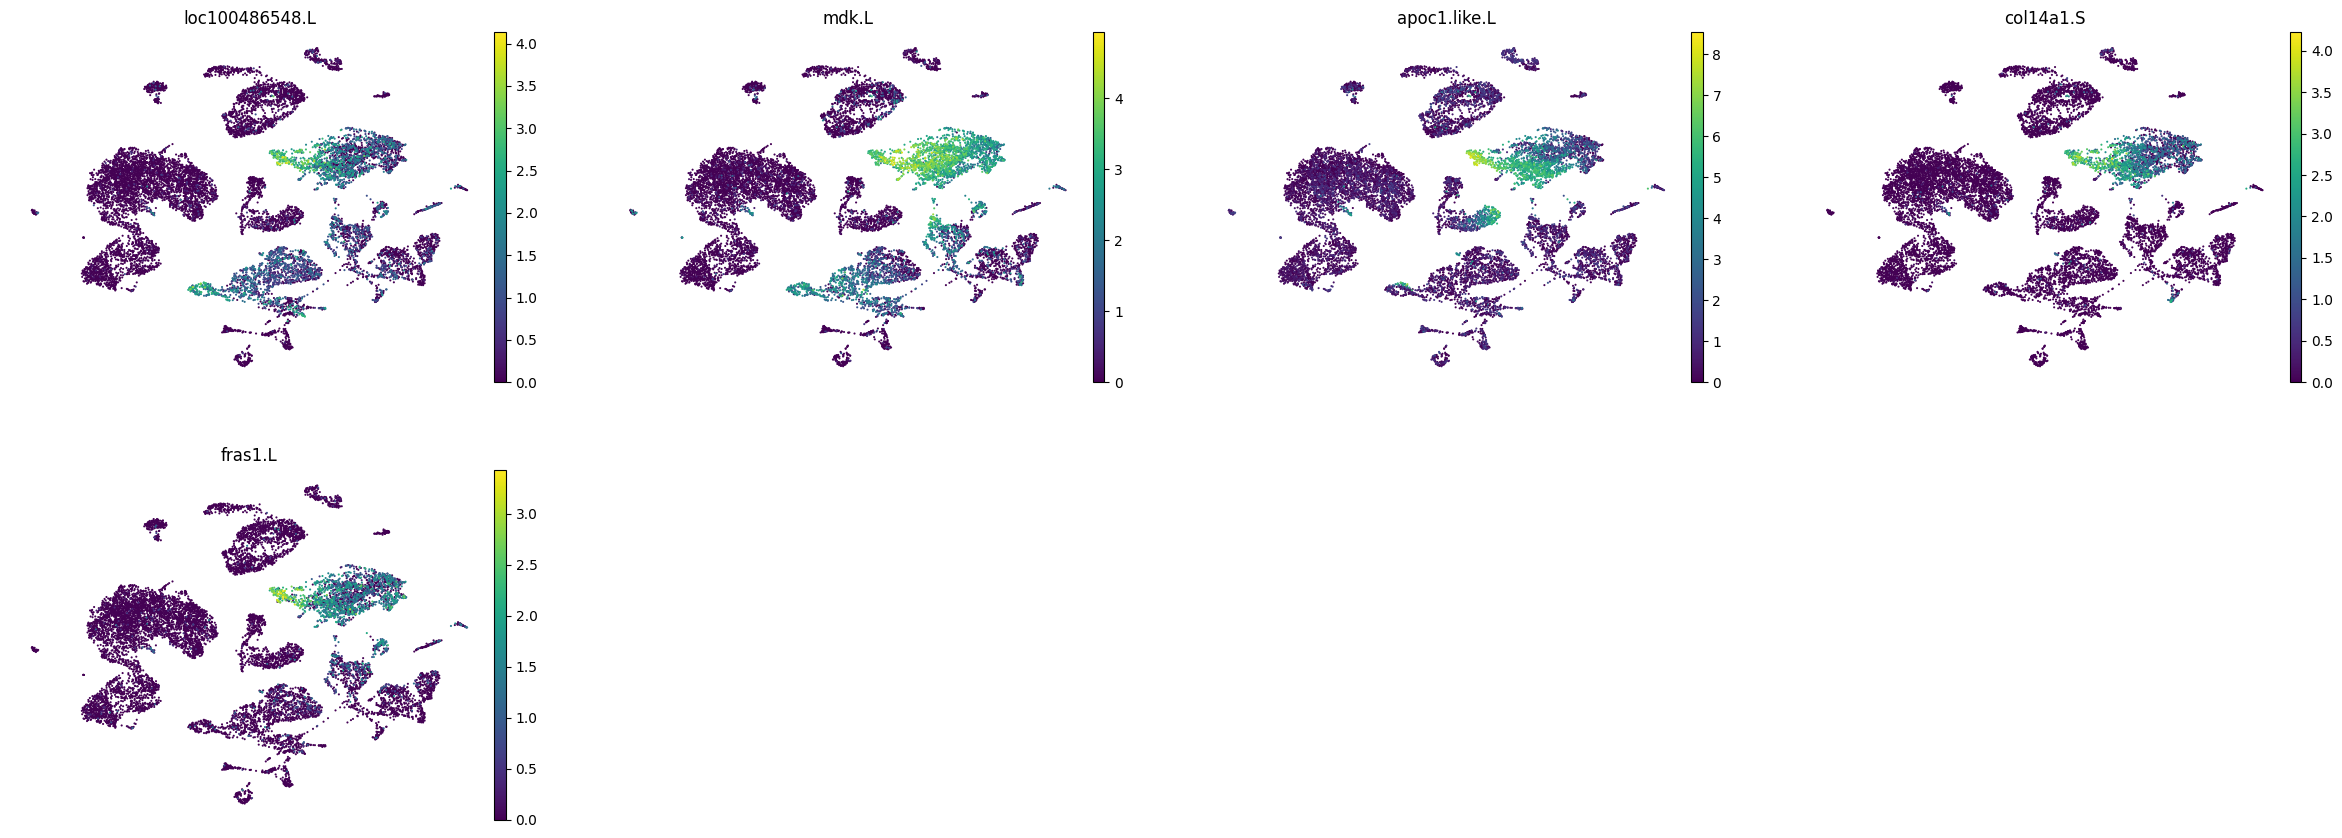

In [ ]:
sc.pl.umap(adata, color=["loc100486548.L", "mdk.L", "apoc1.like.L", "col14a1.S", "fras1.L"], frameon=False)

In [ ]:
sc.tl.rank_genes_groups(adata, groupby="louvain", method="logreg")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
roc_logreg_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[roc_cluster_id].head(10)
print("Top ROC Marker Genes (Logistic Regression):\n", roc_logreg_markers)

Top ROC Marker Genes (Logistic Regression):
 0         apoc1.like.L
1                mdk.L
2            frem2.1.L
3                fn1.S
4             krt5.7.S
5              krt16.S
6    Xetrov90029035m.L
7                mdk.S
8               pltp.S
9              sparc.S
Name: 15, dtype: object


In [ ]:
# Convert ROC marker genes into a cleaned set
roc_logreg_genes_cleaned = clean_gene_names(roc_logreg_markers)

# Now compare ROC-specific genes with Supplementary Table 3
overlap_genes = roc_logreg_genes_cleaned.intersection(supp_genes)
print(f"Overlap with Supplementary Table 3: {overlap_genes}")

Overlap with Supplementary Table 3: {'frem2', 'pltp'}


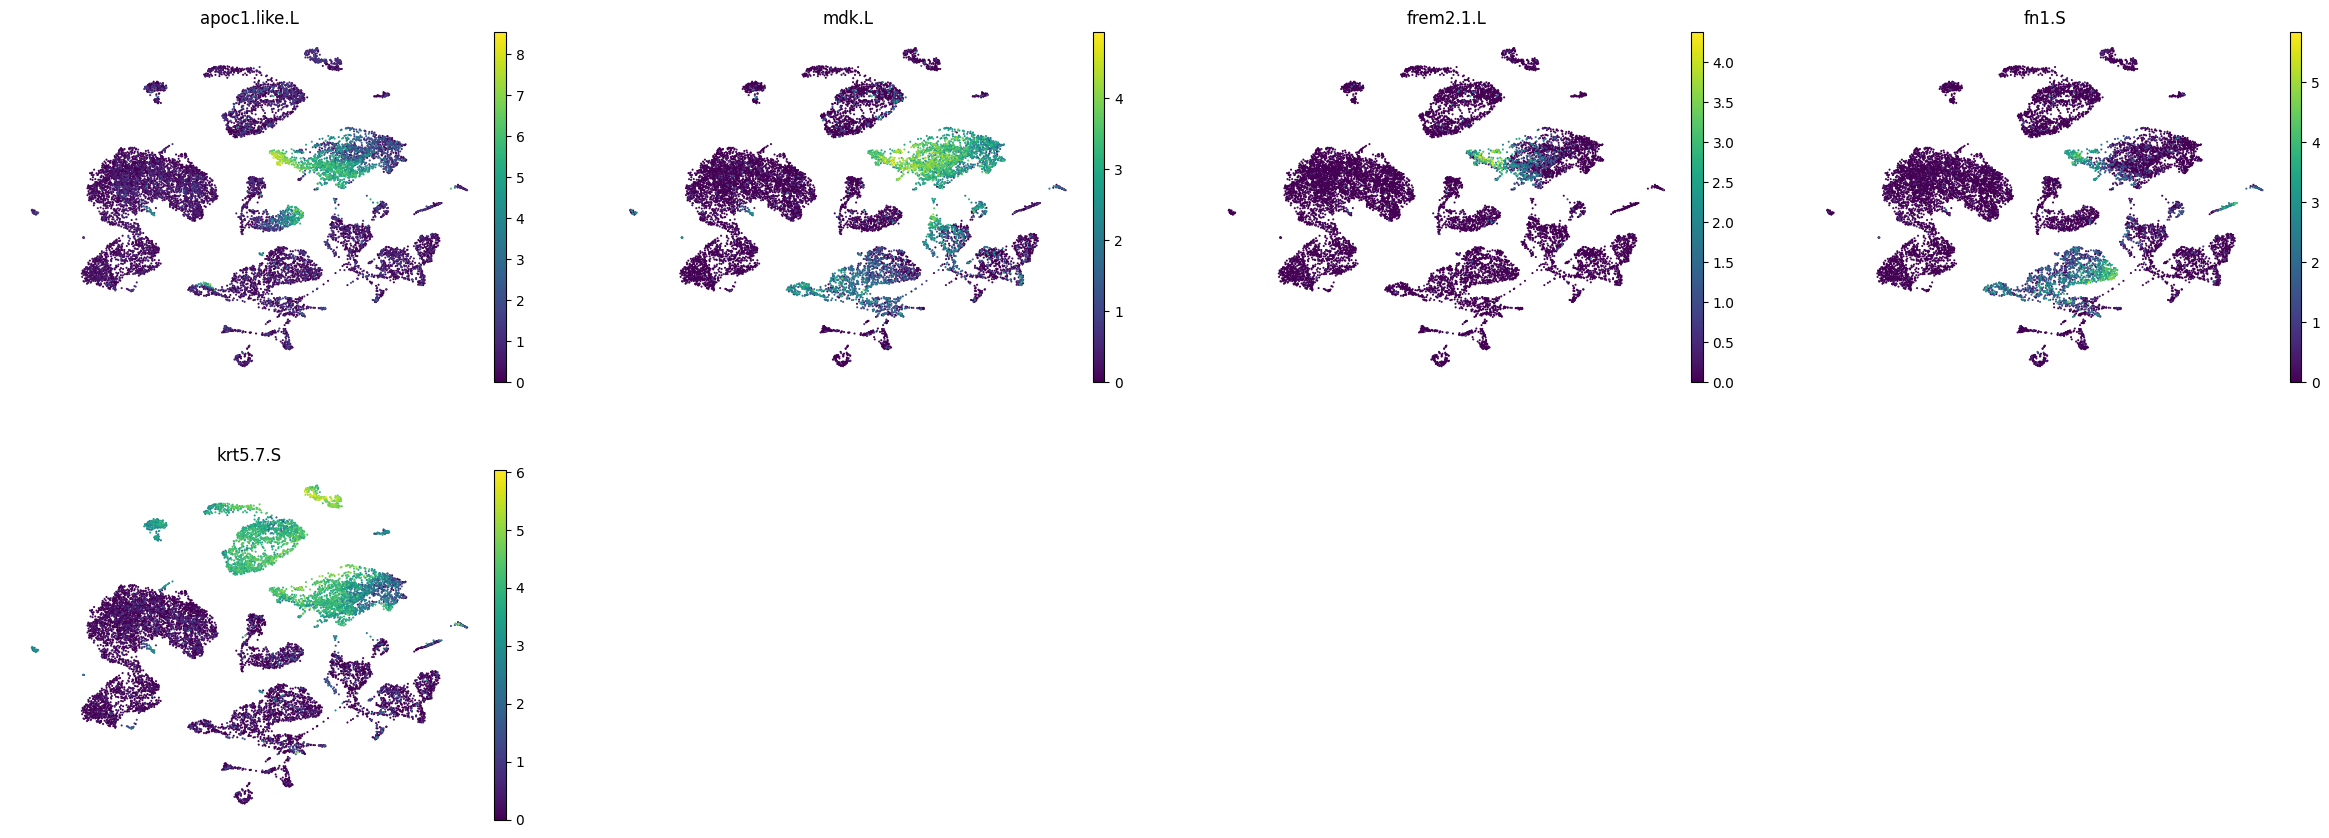

In [ ]:
sc.pl.umap(adata, color=["apoc1.like.L", "mdk.L", "frem2.1.L", "fn1.S", "krt5.7.S"], frameon=False)

In [ ]:
overlap_methods = set(roc_markers).intersection(set(roc_logreg_markers))
print(f"Genes identified by both Wilcoxon & Logistic Regression: {overlap_methods}")

Genes identified by both Wilcoxon & Logistic Regression: {'frem2.1.L', 'mdk.L', 'fn1.S', 'apoc1.like.L'}


In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.2/549.2 kB 7.4 MB/s eta 0:00:00


In [ ]:
import gseapy as gp
import pandas as pd

# Perform GO enrichment analysis
go_results = gp.enrichr(gene_list=list(overlap_genes),
                         gene_sets=['GO_Biological_Process_2021'],
                         organism='human')  # Change to 'xenopus' if needed

# Convert results into a DataFrame
go_df = go_results.results

In [ ]:
print(go_df.head(10))  # Show the first 10 GO terms

                     Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap   P-value  \
0                  glycolipid transport (GO:0046836)     1/6  0.000600   
1                    ceramide transport (GO:0035627)    1/14  0.001400   
2     carbohydrate derivative transport (GO:1901264)    1/18  0.001799   
3  high-density lipoprotein particle remodeling (...    1/18  0.001799   
4  positive regulation of cholesterol efflux (GO:...    1/23  0.002299   
5       organophosphate ester transport (GO:0015748)    1/25  0.002498   
6                       amide transport (GO:0042886)    1/28  0.002798   
7      regulation of cholesterol efflux (GO:

In [ ]:
go_df.to_csv("GO_Enrichment_Results.csv", index=False)
print("GO Enrichment results saved locally. You can download from the Files section.")

GO Enrichment results saved locally. You can download from the Files section.


In [ ]:
#from google.colab import files
#files.download("GO_Enrichment_Results.csv")

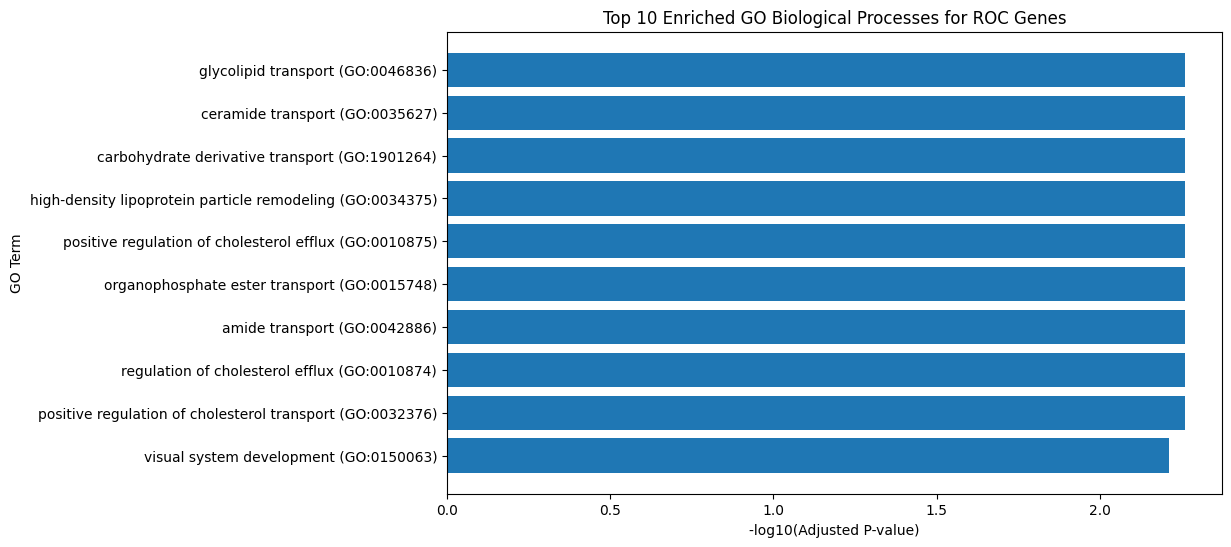

In [ ]:
import matplotlib.pyplot as plt
# Select top 10 enriched GO terms
top_go = go_df.sort_values("Adjusted P-value").head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_go["Term"], -np.log10(top_go["Adjusted P-value"]))
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel("GO Term")
plt.title("Top 10 Enriched GO Biological Processes for ROC Genes")
plt.gca().invert_yaxis()  # Invert to show most significant first
plt.show()

In [ ]:
from scipy.stats import hypergeom
import numpy as np

# Define total number of genes in dataset
total_genes = len(adata.var_names)

# Define the number of genes in each category
genes_in_supp = len(supp_genes)
genes_in_our_markers = len(roc_markers)
overlap_count = len(overlap_genes)

# Compute hypergeometric test p-value
p_value = hypergeom.sf(overlap_count - 1, total_genes, genes_in_supp, genes_in_our_markers)
print(f"Hypergeometric Test P-value: {p_value}")

Hypergeometric Test P-value: 0.0001232982152711532
